# Project 3: Web APIs & Classification - Vikas Kalia

## Problem Statement
I work in the credit card industry and my marketing and legal team would like to review social media posts like Reddit site for current discussion on credit cards. However, many times the posts under r/CRedit subreddit are actually relevant to Credit Card business. 
So there is an opportunity to build a predictive model which is able to classify any new reddit posts in r/CreditCards and r/CRedit subreddits, that should belong to Credit Cards for marketing and legal teams to review. 

## Executive Summary
Data science framework is leveraged to scrape the posts from two subriddits of reddit.com. Data is then cleaned, and transformed for exploratory data analysis. Word vectorizers are leveraged to engineer pots into word vectors. NPL classifier Naive Bayes as well as Logistic regression are used to build model on word vectors. Evaluation techniques like confusion matrix, K-fold cross validation, coefficient analysis, probability distribution and roc_auc curve are leveraged. Finally, accuracy and roc_auv scores are used as metric to determine the model which is best suited to classify Credit Card posts.


### Contents table below provides the framework used to build this predictive model.
- **Import Data Science Libraries**
- **Download posts from r/CreditCards and r/CRedit** 
- **Conduct EDA and data cleaning and feature engineering**
- **Modeling - Training & Evaluation**
- **Conclusions and Recommendations**

### APIs
Credit Cards Posts : https://www.reddit.com/r/CreditCards.json
Credit Score Posts : https://www.reddit.com/r/CRedit.json

### Jupyter Notebooks list:
**Following notebook are created to complete this study**
- **/code/Project_3_VK.ipynb** - Main notebook 


### DataSets
../data/posts_cc_1.csv  => initial list of downloaded posts for r/CRedit subreddit
../data/posts_cr_1.csv  => initial list of downloaded posts for r/CreditCards subreddit
../data/post_cc.csv.    => saved for futher ongoing reference for EDA, Data Transformation and Modeling. 
../data/post_cr.csv.    => saved for futher ongoing reference for EDA, Data Transformation and Modelin
../data/comb_cc_cr.csv  => saved combined list of subreddits

### Modeling Approach
As per the problem statement we are only trying to correctly classify the subreddit correctly. so the only measure used to evaluate the models will be accuracy of classificaiton. Two modeling techniques i.e. Naive Bayes and Logistic Regression are applied on features vectors created by CountVectorizer as well as TF-IDF word vectorizer.
Each model will evaluated with cross_validation method, confusion matrix and Logistic Regression models will be tuned using GridSearchCV method.
**Note:** CreditCards is designated positive class and CRedit is designated negative class

## Import Data Science Libraries

In [1]:
import requests
import pandas as pd
import time
import random

from bs4 import BeautifulSoup 

import nltk
from nltk.stem import WordNetLemmatizer

# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

import regex as re

# Import stemmer.
from nltk.stem.porter import PorterStemmer

# Import stopwords.
from nltk.corpus import stopwords # Import the stopword list

import numpy as np
from os import path
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns



from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.naive_bayes import MultinomialNB

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


from io import StringIO

In [2]:
#!pip install wordcloud

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 3000)

## Download posts from r/CreditCards and r/CRedit subreddits

In [5]:
# This code is commented after executing once.

#res = requests.get(url, headers={'User-agent': 'Adini Cons 1.0'})
#time.sleep(5)'''


In [6]:
# This code is commented after executing once.

#### Downloaded r/CreditCards subreddit 
#after_stamp = ''
#posts_cc_1 = []
#url = 'https://www.reddit.com/r/CreditCards.json'
#for i in range(35):
#    print (i)
#    if after_stamp == None:
#        current_url = url
#    else:
#        current_url = url + '?after=' + after_stamp
#    print(current_url) 
#    res = requests.get(current_url, headers={'User-agent': 'Adini Cons 1.0'})
#    if res.status_code == 200:
#        the_json = res.json()
#        posts_cc_1.extend(the_json['data']['children']) 
#        after_stamp = the_json['data']['after']
#    else:
#        print(f'Exception: {res.status_code}')
#    time.sleep(3)'''    

In [7]:
# This code is commented after executing once.

### Downloaded r/Credit subreddit 
#after_stamp = ''
#posts_cr_1 = []
#url = 'https://www.reddit.com/r/CRedit.json'
#for i in range(35):
#    print (i)
#    if after_stamp == None:
#        current_url = url
#    else:
#        current_url = url + '?after=' + after_stamp
#    print(current_url) 
#    res = requests.get(current_url, headers={'User-agent': 'Adini Cons 1.0'})
#    if res.status_code == 200:
#        the_json = res.json()
#        posts_cr_1.extend(the_json['data']['children'])
#        after_stamp = the_json['data']['after']
#    else:
#        print(f'Exception: {res.status_code}')
#    time.sleep(3)'''    

### Data Description 
Each subreddit record has many columns, however only 'subreddit' which is the name of the subreddit and 'selftext' which contains the actual post was retained for EDA and modeling.


### Remove  duplicate posts by checking on 'selftext' column. 

In [8]:
# This code is commented after executing once.

#cc = pd.DataFrame([i['data'] for i in posts_cc_1])
#print(len(posts_cc_1))
#print(cc['selftext'].duplicated().sum())
#cc.drop_duplicates(subset='selftext',inplace=True)
#print(cc['selftext'].duplicated().sum())

#cr = pd.DataFrame([i['data'] for i in posts_cr_1])
#print(cr['selftext'].duplicated().sum())
#cr.drop_duplicates(subset='selftext',inplace=True)
#print(cr['selftext'].duplicated().sum())'''

In [9]:
# saving the CC df to .csv file
#cc.to_csv('../data/posts_cc_1.csv',index=False)

In [10]:
# saving the CR df to .csv file
#cr.to_csv('../data/posts_cr_1.csv',index=False)

## EDA, Data Cleaning and Feature Engineering

In [11]:
# read from saved posts in csv files in dataframes.
cc_df = pd.read_csv('../data/posts_cc_1.csv')
cr_df = pd.read_csv('../data/posts_cr_1.csv')

In [12]:
cc_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday,crosspost_parent_list,url_overridden_by_dest,crosspost_parent
0,NaN,CreditCards,# If you are looking for your first card pleas...,t2_ijzi0,False,NaN,1,False,"Before you post, read this!",[],r/CreditCards,False,6,NaN,0,NaN,False,t3_bzi27a,False,dark,0.98,#ea0027,public,110,1,{},b2bce2dc-a0e0-11e9-8f25-0efa30793166,False,[],NaN,False,False,NaN,{},Announcement,False,110,NaN,False,NaN,1563143426.0,NaN,[],{'gid_2': 1},NaN,True,NaN,1.560315e+09,text,6,NaN,NaN,text,self.CreditCards,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,top,NaN,NaN,True,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,c3b83992-d7dc-11e8-86f6-0ed2f1a65edc,False,False,False,M,[],False,NaN,NaN,moderator,t5_2qmhl,NaN,NaN,#0dd3bb,bzi27a,True,NaN,GlitchedSouls,NaN,23,True,all_ads,False,[],False,light,/r/CreditCards/comments/bzi27a/before_you_post...,all_ads,True,https://www.reddit.com/r/CreditCards/comments/...,85450,1.560287e+09,0,NaN,False,NaN,NaN,NaN,NaN
1,NaN,CreditCards,The full list of sub rules:\n\n* Do Not Ask Fo...,t2_r2yl2,False,NaN,0,False,"Don't want to get banned? Be nice, and don't p...",[],r/CreditCards,False,6,NaN,0,NaN,False,t3_ibjbde,False,dark,0.93,NaN,public,94,1,{},NaN,False,[],NaN,False,False,NaN,{},Announcement,False,94,NaN,True,NaN,False,NaN,[],{},NaN,True,NaN,1.597716e+09,text,6,NaN,NaN,text,self.CreditCards,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,top,NaN,NaN,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,c3b83992-d7dc-11e8-86f6-0ed2f1a65edc,False,False,False,NaN,[],False,NaN,NaN,moderator,t5_2qmhl,NaN,NaN,#0dd3bb,ibjbde,True,NaN,philosophers_groove,NaN,15,True,all_ads,False,[],False,NaN,/r/CreditCards/comments/ibjbde/dont_want_to_ge...,all_ads,True,https://www.reddit.com/r/CreditCards/comments/...,85450,1.597687e+09,0,NaN,False,NaN,NaN,NaN,NaN
2,NaN,CreditCards,NaN,t2_63qargat,False,NaN,0,False,We've all seen the pending updates to the Free...,[],r/CreditCards,False,6,NaN,0,NaN,False,t3_ikw7ea,False,dark,0.90,NaN,public,64,0,{},NaN,False,[],NaN,False,False,NaN,{},Discussion,False,64,NaN,False,NaN,False,NaN,[],{},NaN,True,NaN,1.599034e+09,text,6,NaN,NaN,text,self.CreditCards,True,NaN,NaN,top,NaN,NaN,False,False,False,False,False,[],[],False,1e3fcb28-d814-11e8-9645-0edb1b74fc1a,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qmhl,NaN,NaN,#ff4500,ikw7ea,True,NaN,TheVillageLooney,NaN,56,True,all_ads,False,[],False,NaN,/r/CreditCards/comments/ikw7ea/weve_all_seen_t...,all_ads,False,https://www.reddit.com/r/CreditCards/comments/...,85450,1.599005e+09,0,NaN,False,NaN,NaN,NaN

In [13]:
cr_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday,crosspost_parent_list,url_overridden_by_dest,crosspost_parent
0,NaN,CRedit,Whether you are just starting out repairing yo...,t2_3irk4,False,NaN,0,False,[FAQ] Please Include As Many Details as Possib...,[],r/CRedit,False,6,NaN,0,NaN,False,t3_1xrsk7,False,light,1.00,#ea0027,public,8,0,{},9df54626-c0fd-11ea-8550-0ef344532385,False,[],NaN,False,False,NaN,{},MOD,False,8,NaN,False,NaN,False,NaN,[],{},NaN,True,NaN,1.392291e+09,text,6,NaN,NaN,text,self.CRedit,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,True,False,False,False,False,[],[],False,a2fe3a8c-c01d-11ea-b392-0e095e1100d7,False,False,False,M,[],False,NaN,NaN,NaN,t5_2qph1,NaN,NaN,#ea0027,1xrsk7,True,NaN,bobbonew,NaN,0,True,all_ads,False,[],False,light,/r/CRedit/comments/1xrsk7/faq_please_include_a...,all_ads,True,https://www.reddit.com/r/CRedit/comments/1xrsk...,45306,1.392263e+09,0,NaN,False,NaN,NaN,NaN,NaN
1,NaN,CRedit,"Here is the text from their site:\n\n""During t...",t2_ax8zn,False,NaN,0,False,Your complete credit report for all three bure...,[],r/CRedit,False,6,NaN,0,NaN,False,t3_g57rig,False,light,1.00,#ea0027,public,450,1,{},9df54626-c0fd-11ea-8550-0ef344532385,False,[],NaN,False,False,NaN,{},MOD,False,450,NaN,False,NaN,False,NaN,[],{'gid_1': 1},NaN,True,NaN,1.587469e+09,text,6,NaN,NaN,text,self.CRedit,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,a2fe3a8c-c01d-11ea-b392-0e095e1100d7,False,False,False,M,[],False,NaN,NaN,NaN,t5_2qph1,NaN,NaN,#ea0027,g57rig,True,NaN,bradrlaw,NaN,65,False,all_ads,False,[],False,light,/r/CRedit/comments/g57rig/your_complete_credit...,all_ads,True,https://www.reddit.com/r/CRedit/comments/g57ri...,45306,1.587440e+09,0,NaN,False,NaN,NaN,NaN,NaN
2,NaN,CRedit,I’m not sure if this has been discussed before...,t2_2ohd5wsk,False,NaN,0,False,Beware of scammers who target this subreddit.,[],r/CRedit,False,6,NaN,0,NaN,False,t3_ikx1va,False,dark,0.99,NaN,public,69,0,{},NaN,False,[],NaN,False,False,NaN,{},General,False,69,NaN,False,NaN,False,NaN,[],{},NaN,True,NaN,1.599037e+09,text,6,NaN,NaN,text,self.CRedit,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,[],[],False,8296e23a-c01d-11ea-81d6-0e5730417905,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qph1,NaN,NaN,#94e044,ikx1va,True,NaN,kayjayhx66,NaN,3,True,all_ads,False,[],False,NaN,/r/CRedit/comments/ikx1va/beware_of_scammers_w...,all_ads,False,https://www.reddit.com/r/CRedit/comments/ikx1v...,45306,1.599009e+09,0,NaN,False,NaN,NaN,NaN,NaN
3

### Validating number of rows and any duplicates and null null values.

In [14]:
cc_df['subreddit'].value_counts()

CreditCards    848
Name: subreddit, dtype: int64

In [15]:
cc_df['selftext'].duplicated().sum()

0

In [16]:
cr_df['subreddit'].value_counts()

CRedit    863
Name: subreddit, dtype: int64

In [17]:
cr_df['selftext'].duplicated().sum()

0

In [18]:
cc_text = cc_df[['subreddit','selftext']]

In [19]:
cr_text = cr_df[['subreddit','selftext']]

In [20]:
comb_cc_cr = pd.concat([cr_text, cc_text], ignore_index=True)

In [21]:
comb_cc_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  1711 non-null   object
 1   selftext   1709 non-null   object
dtypes: object(2)
memory usage: 26.9+ KB


In [22]:
comb_cc_cr.isnull().sum()

subreddit    0
selftext     2
dtype: int64

In [23]:
comb_cc_cr.dropna(inplace=True)

In [24]:
comb_cc_cr.isnull().sum()

subreddit    0
selftext     0
dtype: int64

In [25]:
comb_cc_cr.to_csv('../data/comb_cc_cr.csv',index=False)

In [26]:
comb_cc_cr = pd.read_csv('../data/comb_cc_cr.csv')

In [27]:
comb_cc_cr['subreddit'].value_counts()

CRedit         862
CreditCards    847
Name: subreddit, dtype: int64

In [28]:
comb_cc_cr.head()

,subreddit,selftext
0,CRedit,Whether you are just starting out repairing yo...
1,CRedit,"Here is the text from their site:\n\n""During t..."
2,CRedit,I’m not sure if this has been discussed before...
3,CRedit,Hi all. Long story short I lost my job last ye...
4,CRedit,"Long time lurker, read everything I could find..."


In [29]:
# Create train_test_split and comment this code to use same version of train/test datasets.
X_train, X_test, y_train, y_test = train_test_split(comb_cc_cr[['selftext']],
                                                    comb_cc_cr['subreddit'],
                                                    test_size = 0.25,
                                                    random_state = 42)


In [30]:
print(f'Predictors {X_train.shape, X_test.shape}') 
print(f'Target {y_train.shape, y_test.shape}')


Predictors ((1281, 1), (428, 1))
Target ((1281,), (428,))


In [31]:
X_test.head()

,selftext
567,"Hi, I have paid down my credit card considerab..."
1326,I have an old authorized user CSP and I recent...
1061,Public offer: 40k miles + $100 statement credi...
115,I just got an email from capital one claiming ...
453,I often employ credit freezes with all 3 burea...


In [32]:
X_train.head()

,selftext
236,I recently received the money to pay of my car...
1578,I am looking to get a new card to give me more...
1419,"Hi, I don't want annual fee cards because I wo..."
1645,Hi there! Due to COVID I have relocated to Spa...
701,"\n\nI strive to have good credit, however I d..."


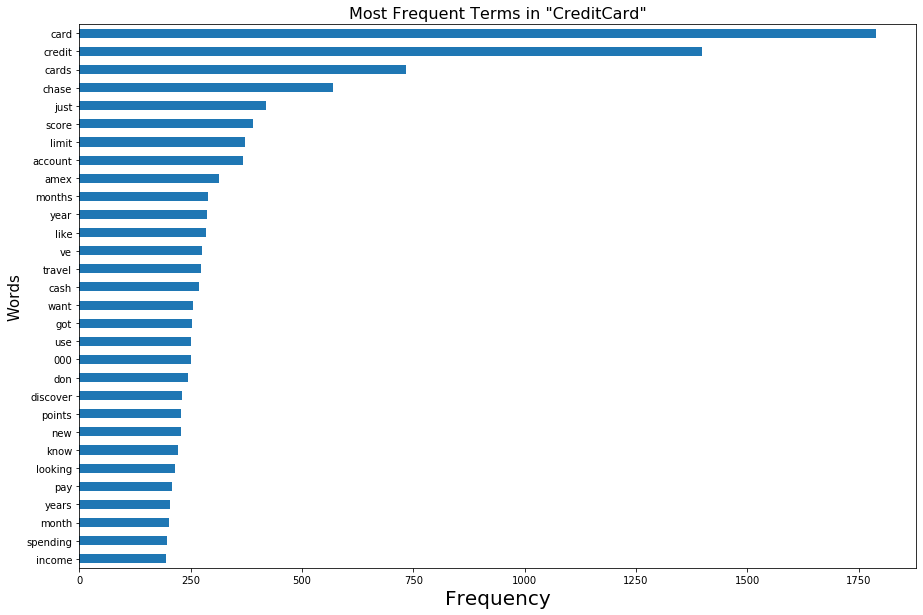

In [33]:
#Create a a barplot to show the frequency of the
#the different words that appear in a given text.

#intialized CountVectorizer
cv=CountVectorizer(stop_words='english')
#fitting CV
cv.fit(comb_cc_cr[comb_cc_cr['subreddit'] == 'CreditCards']['selftext'])
#transforming
transformed=cv.transform(comb_cc_cr[comb_cc_cr['subreddit'] == 'CreditCards']['selftext'])
#Turning it into a DataFrame
transformed_df=pd.DataFrame(transformed.toarray(),columns= cv.get_feature_names())
#plt aesthetics
plt.figure(figsize=(15,10));
plt.xlabel('Frequency', size = 20);
plt.ylabel('Words', size = 15);
plt.title(f'Most Frequent Terms in "CreditCard"', size = 16);
#ploting barchart
transformed_df.sum().sort_values(ascending=True).tail(30).plot(kind='barh');

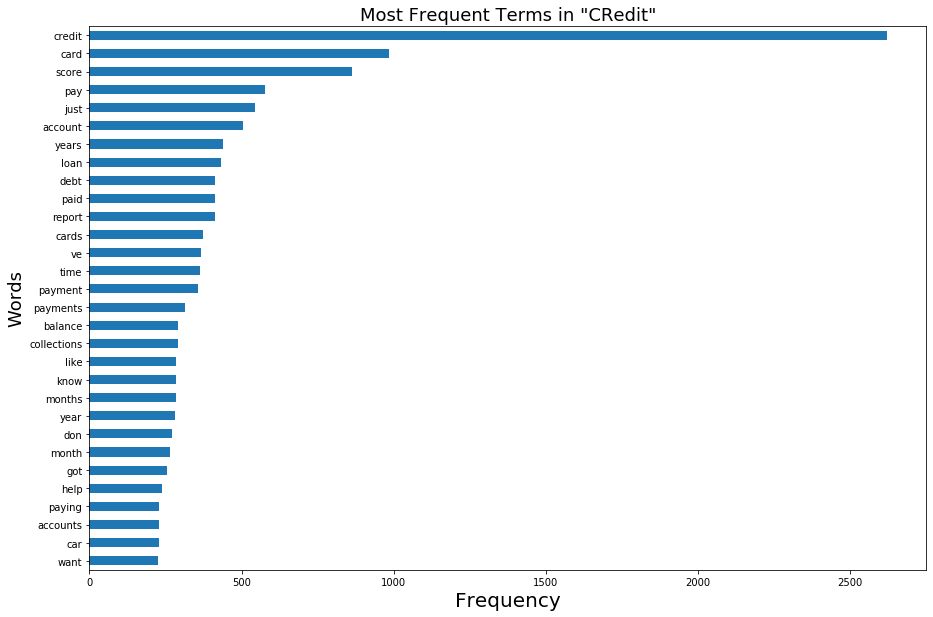

In [34]:
#Create a a barplot to show the frequency of the
#the different words that appear in a given text.

#intialized CountVectorizer
cv=CountVectorizer(stop_words='english')
#fitting CV
cv.fit(comb_cc_cr[comb_cc_cr['subreddit'] == 'CRedit']['selftext'])
#transforming
transformed=cv.transform(comb_cc_cr[comb_cc_cr['subreddit'] == 'CRedit']['selftext'])
#Turning it into a DataFrame
transformed_df=pd.DataFrame(transformed.toarray(),columns= cv.get_feature_names())
#plt aesthetics
plt.figure(figsize=(15,10));
plt.xlabel('Frequency', size = 20);
plt.ylabel('Words', size = 18);
plt.title(f'Most Frequent Terms in "CRedit"', size = 18);
#ploting barchart
transformed_df.sum().sort_values(ascending=True).tail(30).plot(kind='barh');

**Observation:** Most frequent and commom words across both subreddits are 'credit','card','score','account','got','pay' &'year'. So I will include these in the initial stopwords list for word vectorization.

In [35]:
my_stopwords = ['credit','card','score','account','got','pay','year']

### Data transformation and Feature Engineering

In [36]:
# Remove HTML addresses
from bs4 import BeautifulSoup             

# build a function to 
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML.
    review_text = BeautifulSoup(raw_review).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stopwords to a set.
    stop_w = stopwords.words('english')
    stops = set(stop_w)
    
    # 5. Remove stopwords.
    meaningful_words = [w for w in words if not w in stops]
    
    # 6. for i in range(len(spam_tokens)):
    p_stemmer = PorterStemmer()
    stem_words = [p_stemmer.stem(i) for i in meaningful_words] 
    meaningful_words = stem_words
    
    # 7. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [37]:
comb_cc_cr['selftext'].head(20) 

0     Whether you are just starting out repairing yo...
1     Here is the text from their site:\n\n"During t...
2     I’m not sure if this has been discussed before...
3     Hi all. Long story short I lost my job last ye...
4     Long time lurker, read everything I could find...
5     I need some serious help getting my finances i...
6     Hi guys!I'm a 28F in Canada who recently moved...
7     In another group on social media it was sugges...
8     Hello,\n\n\nWhat is with the scammers nowadays...
9     I use rocket hq to check my FICO score, and I ...
10    Was informed from my lender that I needed to d...
11    I disputed a few late payments on my credit re...
12    So this is a general question about credit. I ...
13    I need a laptop because I’m getting into the s...
14    My Fico (Experian) is way higher than my Credi...
15    I managed to get my credit score good by using...
16    I had credit karma awhile back and it said I d...
17    Yes I know Credit Karma only check 2 burea

### Wordcloud for r/CreditCards and r/CRedit

In [38]:
# Initialize an empty list to hold the clean reviews.
clean_cc_posts = []
clean_cr_posts = []


# For every review in our training set...
for raw_cr_posts in comb_cc_cr[comb_cc_cr['subreddit'] == 'CreditCards']['selftext']:
    
    # Convert review to words, then append to clean_cr_posts.
    clean_cr_posts.append(review_to_words(raw_cr_posts))
    
# For every post in our posts set...
for raw_cc_posts in comb_cc_cr[comb_cc_cr['subreddit'] == 'CRedit']['selftext']:
    
# Convert review to words, then append to clean_cc_posts.
    clean_cc_posts.append(review_to_words(raw_cc_posts))

/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:314: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:389: UserWarning: "https://i.imgur.com/edFAQka.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [39]:
clean_cc_posts[:5]

['whether start repair credit build credit maintain credit includ mani detail possibl ask help feedback good credit gener formula mean exact scienc mani detail overlook get best possibl suggest feedback tri includ mani follow detail possibl account card loan mortgag etc bad good includ name help know previou strategi deal credit limit balanc round number keep anonym last payment date date last delinqu determin fall report date open payment statu pay agre sold collect etc estim late includ follow person inform may freeli share gener inform ie name report address name social secur number',
 'text site time covid access credit import equifax experian transunion offer free weekli onlin report april definit worth get report least month period pay variou servic may want suspend save money unfortun includ key credit score still pay usual site sever piec key inform offici report readili avail typic free credit report site notabl dofd date first delinqu calcul date neg item remov report',
 'sur

In [40]:
clean_cr_posts[:5]

['look first card pleas look http www reddit com r creditcard comment r h look get first new credit card read first x b rule post referr link post link shorten ask help crime post ask give referr link x b recommend use templat would like repli post x b current card list card limit open date e g amex bcp limit may fico score e g oldest account age e g year month chase statu e g incom e g averag monthli spend categori dine groceri ga travel open busi card e g purpos next card e g build credit balanc transfer travel cashback card look ok categori spend want gener spend card x b common abbrevi lingo x b fico score score use credit issuer score given credit karma credit sesam capit one etc myfico com http myfico com experian com http experian com creditscorecard com http creditscorecard com fico score aaoa averag age account chase rule rule two chase credit card applic everi day chase rule rule open account past month cannot get approv new chase card af annual fee sub sign bonu msr minimum 

In [41]:
# Convert strings to list to be used for wordcloud
def convertToList(string): 
    li = list(string.split(" ")) 
    return li 


def listToString(s):  
    str1 = ""     
    for ele in s:  
        str1 += ele      
    return str1  
        
wordcloud_cc = listToString(clean_cc_posts)
wordcloud_cr = listToString(clean_cr_posts)



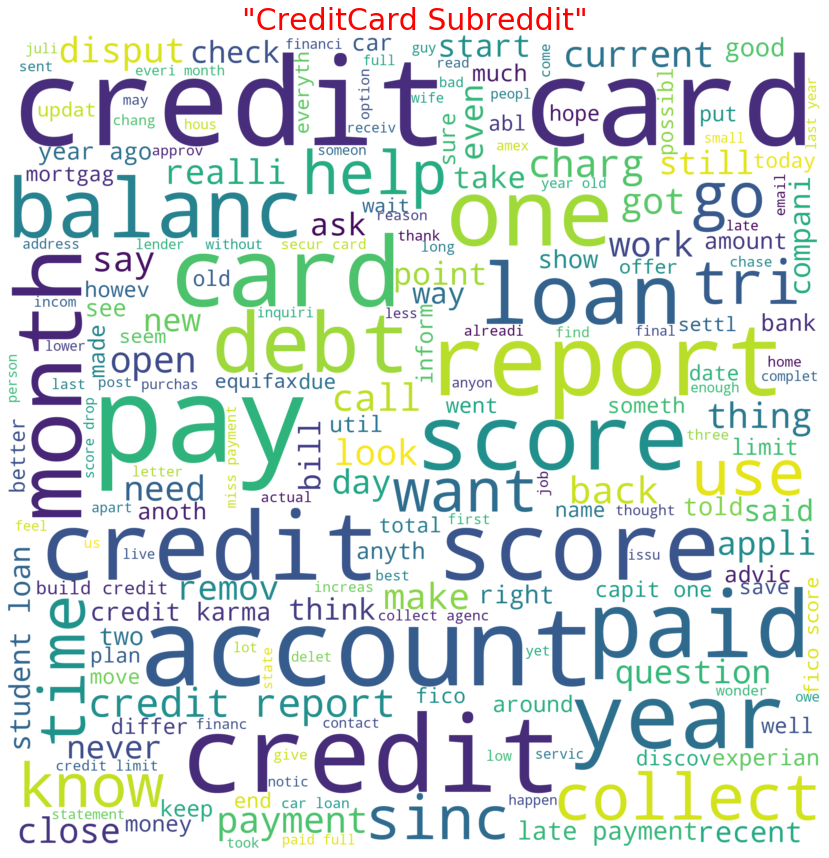

In [42]:
# Create wordcloud
text_cc = wordcloud_cc


# Create and generate a word cloud image:
wordcloud = WordCloud(width = 2000, height =2000, 
                        background_color ='white', 
                        min_font_size = 10,
                        normalize_plurals=True,
                        stopwords = None, 
                        repeat=False).generate(text_cc)

# Display the generated image:
plt.figure(figsize = (15, 15));
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off");
plt.title('"CreditCard Subreddit"',fontsize=30,color='red');
plt.show();

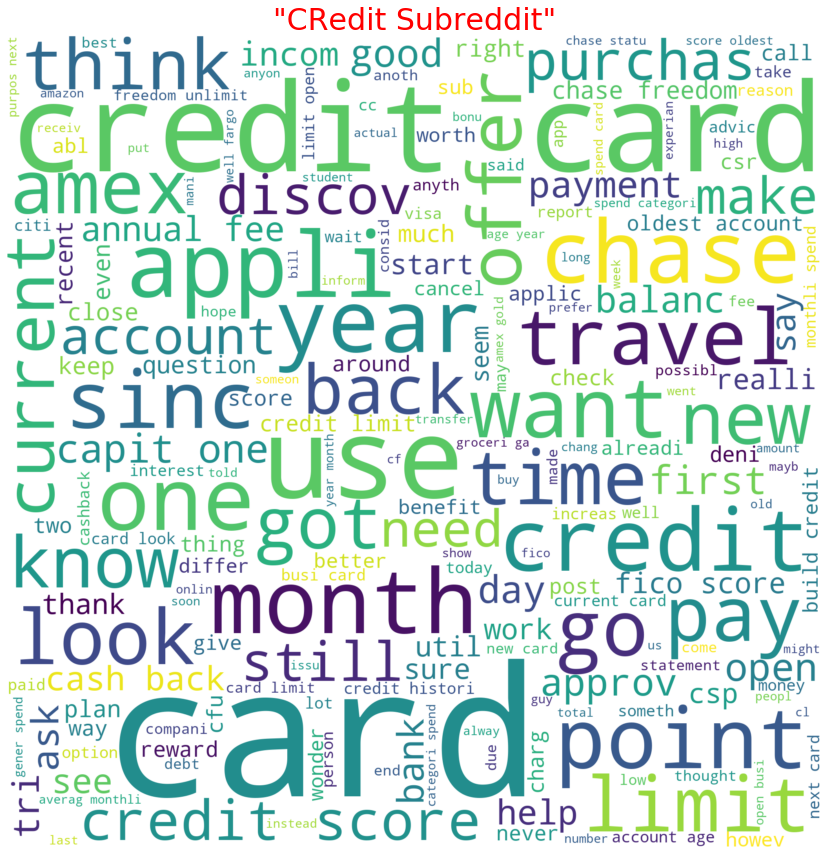

In [43]:
text_cr = wordcloud_cr

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 2000, height =2000, 
                        background_color ='white', 
                        min_font_size = 10,
                        normalize_plurals=True,
                        stopwords = None,
                        repeat=False).generate(text_cr)

# Display the generated image:
plt.figure(figsize = (15, 15));
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off");
plt.title('"CRedit Subreddit"',fontsize=30,color='red');
plt.show();

**Observation: As expected both CreditCards and CRedit posts have words like credit, card, score etc.**

## Transforming Combined Train & Test posts

In [44]:
#add my_stop_words to review_to_words function          

# build a function to 
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML.
    review_text = BeautifulSoup(raw_review).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stopwords to a set.
    stop_w = stopwords.words('english')
    stops = set(stop_w)
    stops.update(my_stopwords)
    
    # 5. Remove stopwords.
    meaningful_words = [w for w in words if not w in stops]
    
    # 6. for i in range(len(spam_tokens)):
    p_stemmer = PorterStemmer()
    stem_words = [p_stemmer.stem(i) for i in meaningful_words] 
    meaningful_words = stem_words
    
    # 7. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [45]:
# Initialize an empty list to hold the clean reviews.
clean_train_posts = []
clean_test_posts = []

# For every review in our training set...
for train_posts in X_train['selftext']:
    
    # Convert review to words, then append to clean_train_reviews.
    clean_train_posts.append(review_to_words(train_posts))
    
# For every post in our posts set...
for test_posts in X_test['selftext']:
    
# Convert review to words, then append to clean_train_reviews.
    clean_test_posts.append(review_to_words(test_posts))

In [46]:
len(clean_train_posts)

1281

In [47]:
len(clean_test_posts)

428

### Replacing Credit with 0 and CreditCards with 1
#### CreditCards is positive class

In [48]:
y_train.replace('CRedit',int(0),inplace=True)

In [49]:
y_train.replace('CreditCards',int(1),inplace=True)

In [50]:
y_test.replace('CRedit',int(0),inplace=True)
y_test.replace('CreditCards',int(1),inplace=True)

In [51]:
# converting and keeping clean posts in dataframes.
X_clean_train = pd.DataFrame(clean_train_posts,columns=['selftext'])
X_clean_test = pd.DataFrame(clean_test_posts,columns=['selftext'])

In [52]:
X_clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   selftext  1281 non-null   object
dtypes: object(1)
memory usage: 10.1+ KB


In [53]:
X_clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   selftext  428 non-null    object
dtypes: object(1)
memory usage: 3.5+ KB


### Count Vectorizer

In [54]:
#update stopwords list with my words
stop_w = stopwords.words('english')
stops = set(stop_w)
stops.update(my_stopwords)

# Instantiate the "CountVectorizer" object, which is sklearn's
# bag of words tool.
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = stops,
                             min_df=2,
                             max_features = 10000) 

In [55]:
# fit_transform() does two things: First, it fits the model and 
# learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a 
# list of strings.

train_data_features = vectorizer.fit_transform(clean_train_posts)
test_data_features = vectorizer.transform(clean_test_posts)

print(train_data_features.shape)
print(test_data_features.shape)

(1281, 2602)
(428, 2602)


In [56]:
df_cvec = pd.DataFrame(train_data_features.toarray(), columns=vectorizer.get_feature_names())
print(df_cvec.shape)
df_cvec.head()

(1281, 2602)


,aadvantag,aaoa,abandon,abil,abl,abroad,absolut,accept,access,accid,accident,accommod,accord,accru,acct,accumul,accur,ach,achiev,acknowledg,acquir,across,act,action,activ,actual,ad,add,addict,addit,address,adjust,admin,admit,adopt,adult,advanc,advantag,advertis,advic,advis,af,affect,affirm,afford,afraid,afternoon,afterward,age,agenc,agent,aggress,ago,agre,agreement,ahead,aid,aim,air,airbnb,airlin,airport,aka,alaska,alert,aliv,alli,allow,almost,alon,along,alreadi,alright,also,altern,although,alticemobil,altitud,alway,amaz,amazon,america,american,americanexpress,amex,among,amount,analysi,angel,angri,anniversari,announc,annoy,annual,annualcreditreport,anoth,answer,anti,anticip,anxieti,...,view,violat,virtual,viru,visa,visibl,visit,voic,vs,wage,wait,waiv,wake,walk,wall,wallet,wallethub,walmart,wanna,want,warn,warrant,warranti,wast,watch,water,way,wear,web,websit,wed,week,weekend,weekli,weigh,weight,weird,welcom,well,went,wf,whatev,whatsoev,whenev,whether,whichev,white,whole,wholesal,whose,wich,wide,wife,wifi,wiki,wild,win,window,wipe,wisdom,wise,wish,withdraw,within,without,woe,woke,woman,wonder,wont,woohoo,word,work,world,worri,wors,worst,worth,worthi,would,wreck,write,written,wrong,wrote,wtf,www,yall,yay,ye,yearli,yesterday,yet,yo,york,young,younger,youtub,yr,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
cvec_words = vectorizer.get_feature_names()
print(cvec_words)

['aadvantag', 'aaoa', 'abandon', 'abil', 'abl', 'abroad', 'absolut', 'accept', 'access', 'accid', 'accident', 'accommod', 'accord', 'accru', 'acct', 'accumul', 'accur', 'ach', 'achiev', 'acknowledg', 'acquir', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addict', 'addit', 'address', 'adjust', 'admin', 'admit', 'adopt', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'af', 'affect', 'affirm', 'afford', 'afraid', 'afternoon', 'afterward', 'age', 'agenc', 'agent', 'aggress', 'ago', 'agre', 'agreement', 'ahead', 'aid', 'aim', 'air', 'airbnb', 'airlin', 'airport', 'aka', 'alaska', 'alert', 'aliv', 'alli', 'allow', 'almost', 'alon', 'along', 'alreadi', 'alright', 'also', 'altern', 'although', 'alticemobil', 'altitud', 'alway', 'amaz', 'amazon', 'america', 'american', 'americanexpress', 'amex', 'among', 'amount', 'analysi', 'angel', 'angri', 'anniversari', 'announc', 'annoy', 'annual', 'annualcreditreport', 'anoth', 'answer', 'anti', 'anticip', 'anxieti', 'anybodi'

In [58]:
# Which words appear the most?
word_counts = df_cvec.sum(axis=0)
print(len(word_counts))
cvec_count = word_counts.sort_values(ascending = False).head(20)

2602


Text(0.5, 1.0, 'Most common words from Count Vectorizer')

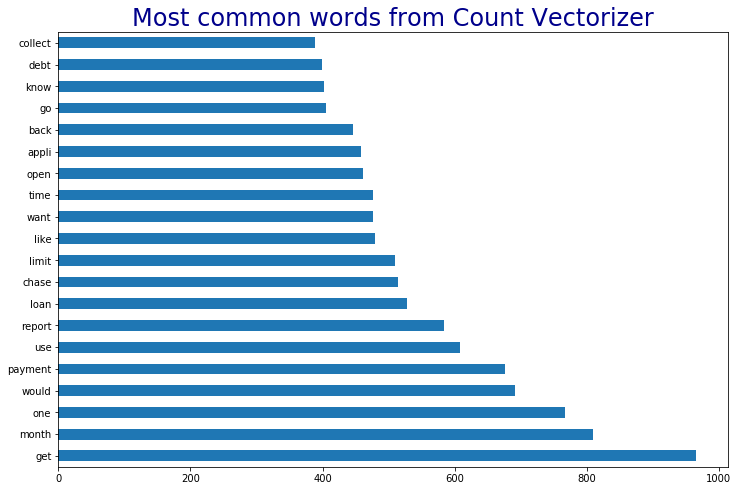

In [59]:
cvec_count.plot(kind='barh',figsize=(12,8));
plt.title('Most common words from Count Vectorizer',fontsize=24,color='darkblue')

**Observation:** Most common words are 'year', 'month' and 'one'.

In [60]:
# Which words appear the least?
cvec_count = word_counts.sort_values(ascending = False).tail(50)

Text(0.5, 1.0, 'Least common words from Count Vectorizer')

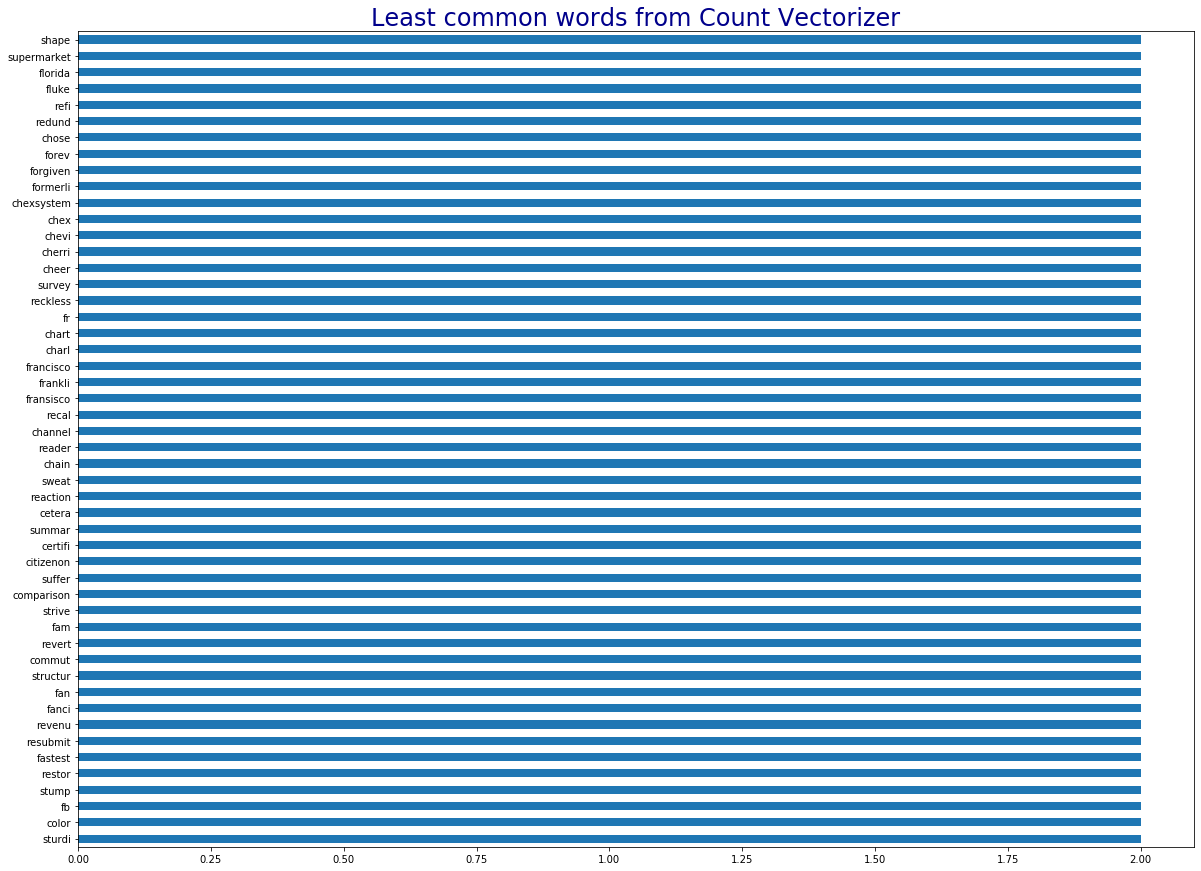

In [61]:
cvec_count.plot(kind='barh',figsize=(20,15));
plt.title('Least common words from Count Vectorizer',fontsize=24,color='darkblue')

### TF-IDF Word vectorizer

In [62]:
stop_w = stopwords.words('english')
stops = set(stop_w)
stops.update(my_stopwords)


tvec = TfidfVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = stops,
                             min_df=2,
                             max_features = 10000)

In [63]:
train_tvec_features = tvec.fit_transform(clean_train_posts)

test_tvec_features = tvec.transform(clean_test_posts)

In [64]:
print(train_tvec_features.shape, test_tvec_features.shape)

(1281, 2602) (428, 2602)


In [65]:
df_tvec = pd.DataFrame(train_tvec_features.toarray(), columns=tvec.get_feature_names())


In [66]:
df_tvec.head()

,aadvantag,aaoa,abandon,abil,abl,abroad,absolut,accept,access,accid,accident,accommod,accord,accru,acct,accumul,accur,ach,achiev,acknowledg,acquir,across,act,action,activ,actual,ad,add,addict,addit,address,adjust,admin,admit,adopt,adult,advanc,advantag,advertis,advic,advis,af,affect,affirm,afford,afraid,afternoon,afterward,age,agenc,agent,aggress,ago,agre,agreement,ahead,aid,aim,air,airbnb,airlin,airport,aka,alaska,alert,aliv,alli,allow,almost,alon,along,alreadi,alright,also,altern,although,alticemobil,altitud,alway,amaz,amazon,america,american,americanexpress,amex,among,amount,analysi,angel,angri,anniversari,announc,annoy,annual,annualcreditreport,anoth,answer,anti,anticip,anxieti,...,view,violat,virtual,viru,visa,visibl,visit,voic,vs,wage,wait,waiv,wake,walk,wall,wallet,wallethub,walmart,wanna,want,warn,warrant,warranti,wast,watch,water,way,wear,web,websit,wed,week,weekend,weekli,weigh,weight,weird,welcom,well,went,wf,whatev,whatsoev,whenev,whether,whichev,white,whole,wholesal,whose,wich,wide,wife,wifi,wiki,wild,win,window,wipe,wisdom,wise,wish,withdraw,within,without,woe,woke,woman,wonder,wont,woohoo,word,work,world,worri,wors,worst,worth,worthi,would,wreck,write,written,wrong,wrote,wtf,www,yall,yay,ye,yearli,yesterday,yet,yo,york,young,younger,youtub,yr,zero
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.219289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.130612,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.078062,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.078062,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056793,0.0,0.0,0.153464,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087655,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.102254,0.0,0.113888,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.185627,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.100962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056890,0.0,0.0,0.000000,0.0,0.0,0.0,0.074333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [67]:
df_tvec.shape

(1281, 2602)

In [68]:
# Which words appear the most?
tvec_counts = df_tvec.sum(axis=0)
print(len(word_counts))
tvec_counts.sort_values(ascending = False).head(20)

2602


get        48.445753
month      44.329654
one        42.888858
payment    41.652341
report     37.478189
would      36.807288
chase      36.680227
use        36.676763
loan       35.452070
limit      34.751352
appli      32.957740
want       30.748163
debt       30.075322
time       29.213504
back       29.207920
like       29.037109
open       28.927517
collect    28.622406
go         27.157525
balanc     26.959695
dtype: float64

In [69]:
print(train_data_features.shape, test_data_features.shape)
print(y_train.shape,y_test.shape)

(1281, 2602) (428, 2602)
(1281,) (428,)


## Model Training & Evaluation

**Approach:** As per the problem statement we are only trying to correctly classify the subreddit correctly. so the only measure used to evaluate the models will be accuracy of classificaiton. 

Two modeling techniques i.e. Naive Bayes and Logistic Regression are applied on features vectors created by CountVectorizer as well as TF-IDF word vectorizer. 

Each model will evaluated with cross_validation method, confusion matrix and Logistic Regression models will be tuned using GridSearchCV method. 

**Note: CreditCards is designated positive class and CRedit is designated negative class**


**Setting up Dataframe to capture scores from various models for summary**

In [70]:
ph1_summary_df = pd.DataFrame
ph1_summary_df = pd.DataFrame(columns=['Model Type','Description','Accuracy','ROC_AUC'],index=None)

## Baseline Classes

In [71]:
y_test.value_counts(normalize=True)

0    0.521028
1    0.478972
Name: subreddit, dtype: float64

In [72]:
ph1_summary_df = ph1_summary_df.append({'Model Type':'Baseline',
                                    'Description':'Class 1 proportion',
                                    'Accuracy': .4789,
                                    'ROC_AUC': 0},
                                   ignore_index=True)

In [73]:
ph1_summary_df.head()

,Model Type,Description,Accuracy,ROC_AUC
0,Baseline,Class 1 proportion,0.4789,0


## Naive Bayes

### Naive Bayes with CVec

In [74]:
# Instantiate Naive Bayes model!
nb_cv = MultinomialNB()
# Fit the model
nb_cv = nb_cv.fit(train_data_features, y_train)
# predict the model


In [75]:
print(f'Train NB accuracy score CVec {nb_cv.score(train_data_features, y_train)}')
print(f'Test NB accuracy score Cvec {nb_cv.score(test_data_features, y_test)}')

Train NB accuracy score CVec 0.8992974238875878
Test NB accuracy score Cvec 0.8387850467289719


### Cross validation for Naive Bayes using Count Vectorizer

In [76]:
print(f'CV Score on train for Naive Bayes with CountVectorizer {cross_val_score(nb_cv, train_data_features, y_train, cv=5).mean()}')


CV Score on train for Naive Bayes with CountVectorizer 0.8454097762645916


In [77]:
train_cvec_preds = nb_cv.predict(train_data_features)
test_cvec_preds = nb_cv.predict(test_data_features)

### Analyse Confusion Matrix 

In [78]:
cm_nb_cvec = confusion_matrix(y_test, test_cvec_preds,normalize='true')
cm_nb_cvec

array([[0.87892377, 0.12107623],
       [0.20487805, 0.79512195]])

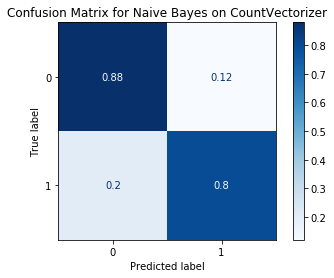

In [79]:
# Generate confusion matrix
plt.figsize=(10,10);
matrix = plot_confusion_matrix(nb_cv, test_data_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true');
plt.title('Confusion Matrix for Naive Bayes on CountVectorizer');
plt.show(matrix);
plt.show();

In [80]:
tn, fp, fn, tp = cm_nb_cvec.ravel()

In [81]:
print("True Negatives: " + str(tn))
print()
print("False Positives: " + str(fp))
print()
print("False Negatives: " + str(fn))
print()
print("True Positives: " + str(tp))

True Negatives: 0.8789237668161435

False Positives: 0.1210762331838565

False Negatives: 0.2048780487804878

True Positives: 0.7951219512195122


**Observation:** CRedit is classified way better than CreditCards.

### Analysing Misclassified Posts

In [82]:
mis_class_df = X_test[['selftext']]

In [83]:
mis_class_df['preds'] = test_cvec_preds

In [84]:
mis_class_df['test'] = y_test

In [85]:
mis_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 567 to 1313
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   selftext  428 non-null    object
 1   preds     428 non-null    int64 
 2   test      428 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.4+ KB


In [86]:
filter = mis_class_df[mis_class_df['preds'] != mis_class_df['test']]

In [87]:
filter.head()

,selftext,preds,test
483,[https://imgur.com/a/3kt3Crv](https://imgur.co...,1,0
1651,Is there any way to enable a two factor authen...,0,1
618,"Hello, I am a 19 years old college student loo...",1,0
781,"Hello,\n\nI've lurked on CRedit for a long tim...",1,0
344,Hey guys my credit score is around 710. I have...,1,0


In [88]:
for i in range(30):
    if filter.iloc[i,2] == 1:
        print(filter.iloc[i,1],filter.iloc[i,0])
        print('')

0 Is there any way to enable a two factor authentication for CapOne credit card accounts?  I’m not seeing it, it’s my only financial account without it and bothers me

0 I have a Chase card that I had used for a balance transfer at 0% earlier in the year.  I used it for some additional purchases and then a couple of weeks later, made a payment in the amount of the total of my purchases and then on the payment due date, I made the minimum payment amount as originally scheduled.  Instead of using my payments to cover the purchases, Chase used those payments to pay down the promotional balance, and now I am being hit with $100 in interest charges on those purchases each month.  Is this legal?  I thought they were required by law  to apply payments above the minimum to higher interest balances first.

0 Hello everyone,

A concert I have purchased tickets for has been postponed indefinitely. The total is about $400. I used my credit card to purchase those tickets and have paid my card off a

**Observation: By review the actuals class 1 posts whih were misclassified, it was noticed that terms used within CreditCards posts like chase & amex are some of the top predictors of the CRedit class.**

In [89]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.


pred_proba = [i[1] for i in nb_cv.predict_proba(test_data_features)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})


#3. Storing Accuracy and roc_auc scores in phase 1 summary dataframe.
ph1_summary_df = ph1_summary_df.append({'Model Type':'Naive Bayes',
                                    'Description':'Train dataset on CVec',
                                    'Accuracy': nb_cv.score(train_data_features, y_train),
                                    'ROC_AUC': 0},
                                   ignore_index=True)


ph1_summary_df = ph1_summary_df.append({'Model Type':'Naive Bayes',
                                    'Description':'Test dataset on CVec',
                                    'Accuracy': nb_cv.score(test_data_features, y_test),
                                    'ROC_AUC': roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])},
                                   ignore_index=True)



### Naive Bayes with TF-IDF

In [90]:
# Instantiate Naive Bayes model!
nb = MultinomialNB()
# Fit the model
nb_tf = nb.fit(train_tvec_features, y_train)



In [91]:
print(f'Train NB accuracy score TF-IDF {nb_tf.score(train_tvec_features, y_train)}')
print(f'Test NB accuracy score TF-IDF {nb_tf.score(test_tvec_features, y_test)}')


Train NB accuracy score TF-IDF 0.9008587041373927
Test NB accuracy score TF-IDF 0.8411214953271028


### Cross validation for Naive Bayes using TF-IDF 

In [92]:
print(f'CV Score on train for Naive Bayes with TF-IDF {cross_val_score(nb_tf, train_tvec_features, y_train, cv=5).mean()}')
print(f'CV Score on test for Naive Baye with TF-IDF {cross_val_score(nb_tf, test_tvec_features, y_test, cv=5).mean()}')


CV Score on train for Naive Bayes with TF-IDF 0.8540004863813231
CV Score on test for Naive Baye with TF-IDF 0.7920109439124486


In [93]:
train_tvec_preds = nb_tf.predict(train_tvec_features)
test_tvec_preds = nb_tf.predict(test_tvec_features)

### Analyse Confusion Matrix 

In [94]:

cm_nb_tf = confusion_matrix(y_test, test_tvec_preds,normalize='true')
cm_nb_tf

array([[0.89686099, 0.10313901],
       [0.2195122 , 0.7804878 ]])

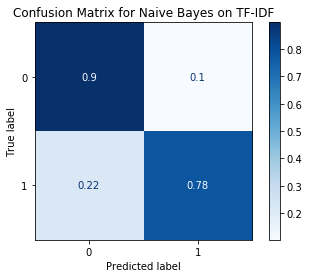

In [95]:
# Generate confusion matrix
matrix = plot_confusion_matrix(nb_tf, test_tvec_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true');
plt.title('Confusion Matrix for Naive Bayes on TF-IDF');
plt.show(matrix);
plt.show();

In [96]:
tn, fp, fn, tp = cm_nb_tf.ravel()

In [97]:
print("True Negatives: " + str(tn))
print()
print("False Positives: " + str(fp))
print()
print("False Negatives: " + str(fn))
print()
print("True Positives: " + str(tp))

True Negatives: 0.8968609865470852

False Positives: 0.1031390134529148

False Negatives: 0.21951219512195122

True Positives: 0.7804878048780488


**Observation:** CreditCards class is classified quite poorly as compared to CRedit class.

In [98]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.
#3. Storing Accuracy and roc_auc scores in phase 1 summary dataframe.

pred_proba = [i[1] for i in nb_tf.predict_proba(test_tvec_features)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})


ph1_summary_df = ph1_summary_df.append({'Model Type':'Naive Bayes',
                                    'Description':'Train dataset on TF-IDF',
                                    'Accuracy': nb_tf.score(train_tvec_features, y_train),
                                    'ROC_AUC': 0},
                                   ignore_index=True)


ph1_summary_df = ph1_summary_df.append({'Model Type':'Naive Bayes',
                                    'Description':'Test dataset on TF-IDF',
                                    'Accuracy': nb_tf.score(test_tvec_features, y_test),
                                    'ROC_AUC': roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])},
                                   ignore_index=True)



## Logistic Regression with CountVectorizer

In [99]:
# Instantiate logistic regression model.
logreg = LogisticRegression(solver = 'lbfgs')

# Fit model to training data.
logreg.fit(train_data_features, y_train)

# Evaluate model on training data.
print(f'Train data logreg accuracy using CountVectorizer {logreg.score(train_data_features, y_train)}')
print(f'Test data logreg accuracy CountVectorizer {logreg.score(test_data_features, y_test)}')

Train data logreg accuracy using CountVectorizer 0.9937548790007806
Test data logreg accuracy CountVectorizer 0.7873831775700935


### Cross validation for Logistic Regression using CountVectorizer

In [100]:
print(f'CV accuracy on train for LogReg with CountVectorizer {cross_val_score(logreg, train_data_features, y_train, cv=5).mean()}')

CV accuracy on train for LogReg with CountVectorizer 0.8048486138132296


**Observation:** Cross validation shows that model will work well with the un-seen data.

**Computing Predicted values and Probabilities used to predict those values**

In [101]:
y_train_pred = logreg.predict(train_data_features)
y_test_pred = logreg.predict(test_data_features)
lrcv_test_prob = logreg.predict_proba(test_data_features)
print(y_train_pred.shape)
print(y_test_pred.shape,lrcv_test_prob.shape)

(1281,)
(428,) (428, 2)


In [102]:
y_test_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [103]:
#'Logistic Regression with CountVectorizer Coefficient: {logreg.coef_}')
logreg_coef = logreg.coef_

In [104]:
np.sort(logreg_coef[0])

array([-1.37631049, -1.34572005, -1.24248013, ...,  0.9145367 ,
        0.97570492,  1.07778389])

In [144]:
np.exp(logreg.coef_)

array([[1.01116348, 0.97331615, 1.00627846, ..., 0.60218916, 1.08993923,
        0.72673017]])

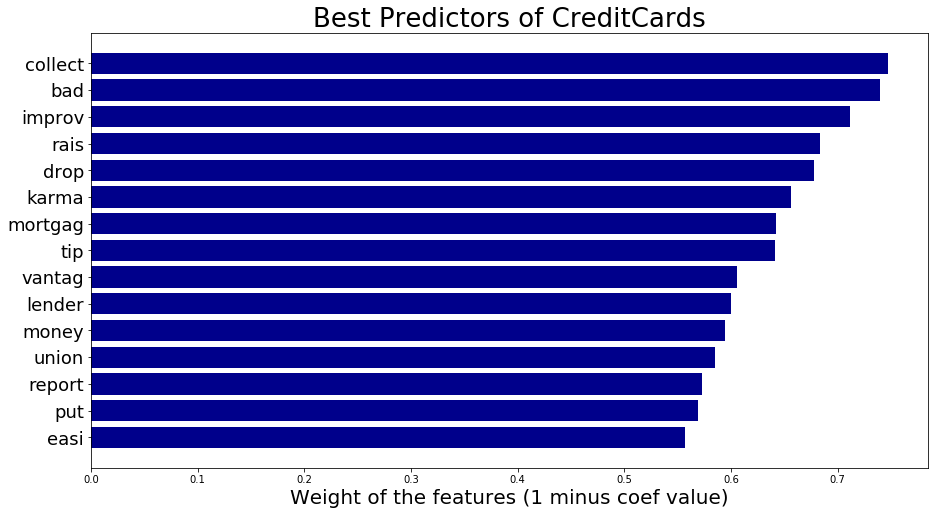

In [105]:
# list features with 
coef_df = pd.DataFrame(list(zip(df_cvec,np.exp(logreg.coef_[0]))))
# creating a table of the top 15 coefficients and the words they belong to
table = coef_df.sort_values(1,ascending=True).head(15)
# Create a horizontal barplot
plt.figure(figsize=(15,8))
# To make the most relevant words as the largest bar
plt.barh(table[0], (1-table[1]),color='darkblue')
# labeling and formatting the y axis
plt.xlabel('Weight of the features (1 minus coef value)', fontsize=20)
# flips the y axis so that the largest bars are on top
plt.ylim(plt.ylim()[::-1])
# setting the font of the yticks
plt.yticks(fontsize=18)
# setting and formatting the title
plt.title('Best Predictors of CreditCards', fontsize=26);

**Observation: As an example, one addtional word 'collect' can increase the log odds of positive class by 0.249 times.**

In [141]:
coef_df.sort_values(1,ascending=True).head(15)

,0,1
428,collect,0.041287
1349,loan,0.044228
1905,report,0.052058
565,debt,0.100090
1646,payment,0.102596
1623,paid,0.149039
689,drop,0.170273
326,car,0.172782
1488,mortgag,0.218005
1259,karma,0.261758


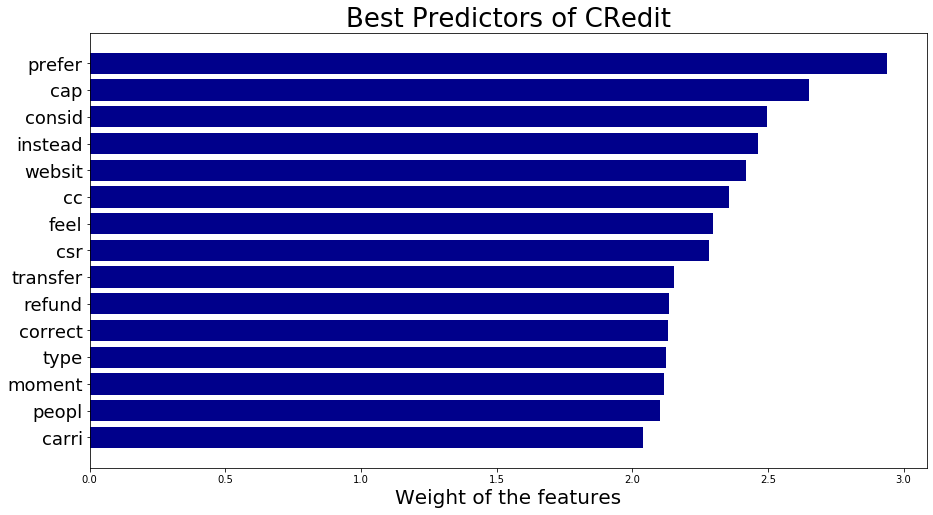

In [107]:
# list features with 
coef_df = pd.DataFrame(list(zip(df_cvec,np.exp(logreg.coef_[0]))))
# creating a table of the top 15 coefficients and the words they belong to
table = coef_df.sort_values(1,ascending=False).head(15)
# Create a horizontal barplot
plt.figure(figsize=(15,8))
# To make the most relevant words as the largest bar
plt.barh(table[0], (table[1]),color='darkblue')
# labeling and formatting the y axis
plt.xlabel('Weight of the features', fontsize=20)
# flips the y axis so that the largest bars are on top
plt.ylim(plt.ylim()[::-1])
# setting the font of the yticks
plt.yticks(fontsize=18)
# setting and formatting the title
plt.title('Best Predictors of CRedit', fontsize=26);

In [108]:
coef_df.sort_values(1,ascending=False).head(15)

,0,1
1724,prefer,2.938161
318,cap,2.653037
469,consid,2.495619
1205,instead,2.464651
2531,websit,2.420168
346,cc,2.358097
873,feel,2.297978
538,csr,2.283775
2372,transfer,2.153181
1861,refund,2.133921


In [109]:

# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in logreg.predict_proba(test_data_features)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

# store accuracy and roc_auc scores to summary dataframe.
ph1_summary_df = ph1_summary_df.append({'Model Type':'Logistic Regression',
                                    'Description':'Train dataset on CVec',
                                    'Accuracy': logreg.score(train_data_features, y_train),
                                    'ROC_AUC': 0},
                                   ignore_index=True)


ph1_summary_df = ph1_summary_df.append({'Model Type':'Logistic Regression',
                                    'Description':'Test dataset on CVec',
                                    'Accuracy': logreg.score(test_data_features, y_test),
                                    'ROC_AUC': roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])},
                                   ignore_index=True)

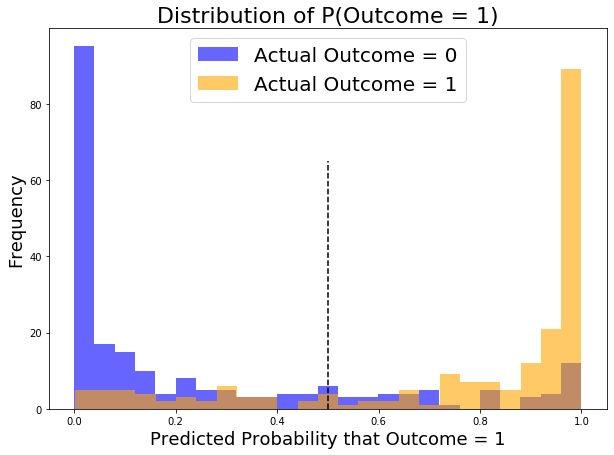

In [110]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Actual Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Actual Outcome = 1')

plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 65,
           color = 'black',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

**Moving the threshhold line from .5 to .2 to visually review on how it change the TP=True Postive classification**

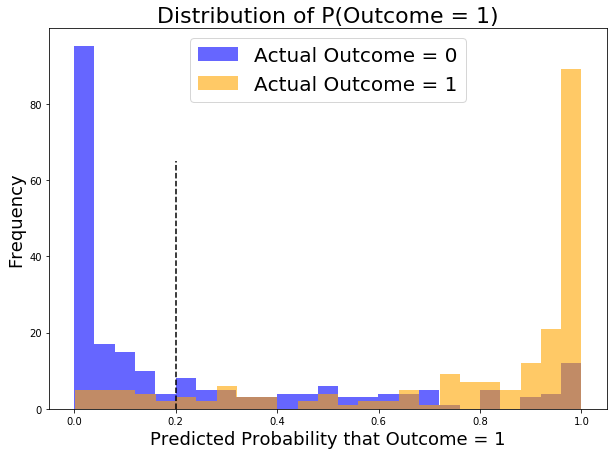

In [111]:

# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Actual Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Actual Outcome = 1')

plt.vlines(x = 0.2,
           ymin = 0,
           ymax = 65,
           color = 'black',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

**Moving the threshhold line from .5 to .2 could sweep substantially more posts under Credit Cards with some addiotnal Credit posts classified as CreditCards**

### Analyse Confusion Matrix for Logistic Reg with CountVectorizer

In [112]:
cm_logreg_cv = confusion_matrix(y_test, y_test_pred,normalize='true')

In [113]:
cm_logreg_cv

array([[0.78475336, 0.21524664],
       [0.2097561 , 0.7902439 ]])

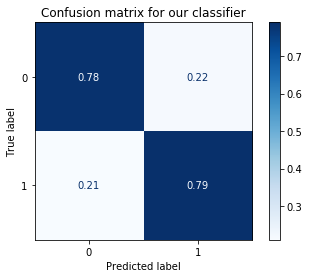

In [114]:
# Generate confusion matrix
matrix = plot_confusion_matrix(logreg, test_data_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [115]:
tn, fp, fn, tp = cm_logreg_cv.ravel()

In [116]:
print("True Negatives: " + str(tn))
print()
print("False Positives: " + str(fp))
print()
print("False Negatives: " + str(fn))
print()
print("True Positives: " + str(tp))

True Negatives: 0.7847533632286996

False Positives: 0.21524663677130046

False Negatives: 0.2097560975609756

True Positives: 0.7902439024390244


**Observation:** CreditCard is classified slightly better than CRedit.

### GridSearchCv with LogReg on CountVectorizer

In [117]:
    X = train_data_features
    y = y_train
    parameters = {'C': [0.001, 0.01, 0.1, 1, 10],
              'class_weight': [None, 'balanced'],
              'penalty': ['l1', 'l2']}
    
    gs_results = GridSearchCV(estimator = LogisticRegression(random_state = 42, solver='liblinear'), # Specify the model we want to GridSearch.
                          param_grid = parameters,                           # Specify the grid of parameters we want to search.
                          scoring = 'accuracy',                              # Specify accuracy as the metric to optimize 
                          cv = 5).fit(X, y)                      # Set 5-fold cross-validation, then fit. (Default is 3.)

In [118]:
gs_results.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Based on the results of this GridSearch, our best model is that which:
- Has an inverse regularization strength of C = 0.01
- has class_weight = None .
- Has the `L2` penalty.

**Applying parameter proposed by GridSearch to LogReg on CountVectorizer**

In [119]:
# Instantiate logistic regression model.
logreg1 = LogisticRegression(solver = 'lbfgs',penalty='l2', C = 0.01)

# Fit model to training data.
logreg1.fit(train_data_features, y_train)

# Evaluate model on training data.
print(f'GridS Train data logreg accuracy score using CountVectorizer {logreg1.score(train_data_features, y_train)}')
print(f'GridS Test data logreg accracy score CountVectorizer {logreg1.score(test_data_features, y_test)}')

# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in logreg1.predict_proba(test_data_features)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

# store accuracy and roc_auc scores to summary dataframe.
ph1_summary_df = ph1_summary_df.append({'Model Type':'Logistic Regression with GS params',
                                    'Description':'Train dataset on CVec',
                                    'Accuracy': logreg1.score(train_data_features, y_train),
                                    'ROC_AUC': 0},
                                   ignore_index=True)


ph1_summary_df = ph1_summary_df.append({'Model Type':'Logistic Regression with GS parama',
                                    'Description':'Test dataset on CVec',
                                    'Accuracy': logreg1.score(test_data_features, y_test),
                                    'ROC_AUC': roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])},
                                   ignore_index=True)


GridS Train data logreg accuracy score using CountVectorizer 0.8743169398907104
GridS Test data logreg accracy score CountVectorizer 0.8177570093457944


**Observation:** While GridsearchCV results have not improved the accuracy of Logistic Reg model, however the model is now less overfitted

## Logistic Regression with TF-IDF

In [120]:
# Instantiate logistic regression.
logregtf = LogisticRegression(solver = 'lbfgs')

# Fit logistic regression.
logregtf.fit(train_tvec_features,y_train)
# Evaluate logistic regression.
print(f'Training logreg accuracy score using TF-IDF: {logregtf.score(train_tvec_features, y_train)}')
print(f'Testing logreg accuracy score using TF-IDF: {logregtf.score(test_tvec_features, y_test)}')

Training logreg accuracy score using TF-IDF: 0.9211553473848556
Testing logreg accuracy score using TF-IDF: 0.8481308411214953


### Cross validation for Logistic Regression using TF-IDF 

In [121]:
print(f'CV Score on train for LogReg with TF-IDF {cross_val_score(logregtf, train_tvec_features, y_train, cv=5).mean()}')


CV Score on train for LogReg with TF-IDF 0.843856395914397


**Observation:** Cross validation shows that this model will perform well on unseen data. 

**Computing Predicted values and Probabilities used to predict those values**

In [122]:
ytf_train_pred = logregtf.predict(train_tvec_features)
ytf_test_pred = logregtf.predict(test_tvec_features)
ytf_train_prob = logregtf.predict_proba(train_tvec_features)
ytf_test_prob = logregtf.predict_proba(test_tvec_features)
print(ytf_train_pred.shape,ytf_train_prob.shape)
print(ytf_test_pred.shape,ytf_test_prob.shape)

(1281,) (1281, 2)
(428,) (428, 2)


In [123]:
ytf_train_pred

array([0, 1, 1, ..., 0, 1, 0])

In [124]:
ytf_train_prob

array([[0.87650032, 0.12349968],
       [0.3038913 , 0.6961087 ],
       [0.06602493, 0.93397507],
       ...,
       [0.7366013 , 0.2633987 ],
       [0.33428516, 0.66571484],
       [0.54445734, 0.45554266]])

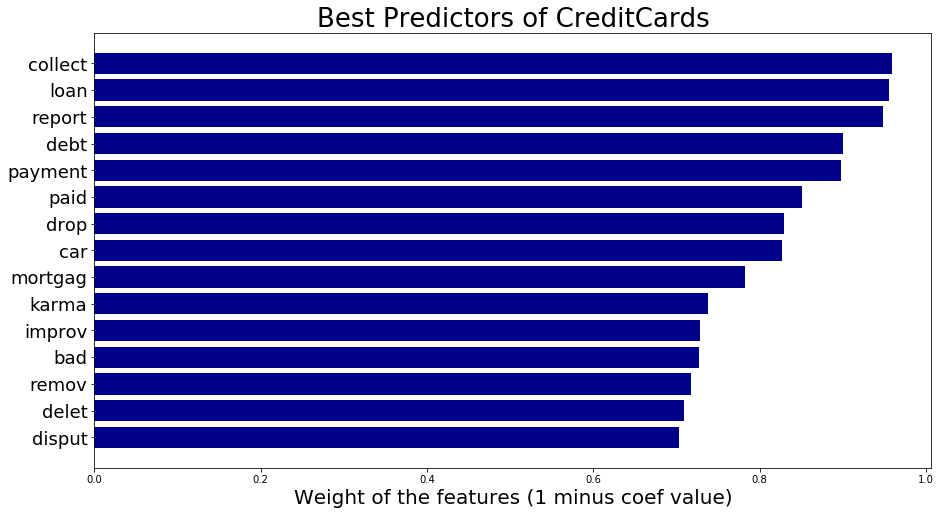

In [125]:
# list features with 
coef_df = pd.DataFrame(list(zip(df_tvec,np.exp(logregtf.coef_[0]))))
# creating a table of the top 15 coefficients and the words they belong to
table = coef_df.sort_values(1,ascending=True).head(15)
# Create a horizontal barplot
plt.figure(figsize=(15,8))
# To make the most relevant words as the largest bar
plt.barh(table[0], (1-table[1]),color='darkblue')
# labeling and formatting the y axis
plt.xlabel('Weight of the features (1 minus coef value)', fontsize=20)
# flips the y axis so that the largest bars are on top
plt.ylim(plt.ylim()[::-1])
# setting the font of the yticks
plt.yticks(fontsize=18)
# setting and formatting the title
plt.title('Best Predictors of CreditCards', fontsize=26);

In [126]:
coef_df.sort_values(1,ascending=True).head(15)

,0,1
428,collect,0.041287
1349,loan,0.044228
1905,report,0.052058
565,debt,0.100090
1646,payment,0.102596
1623,paid,0.149039
689,drop,0.170273
326,car,0.172782
1488,mortgag,0.218005
1259,karma,0.261758


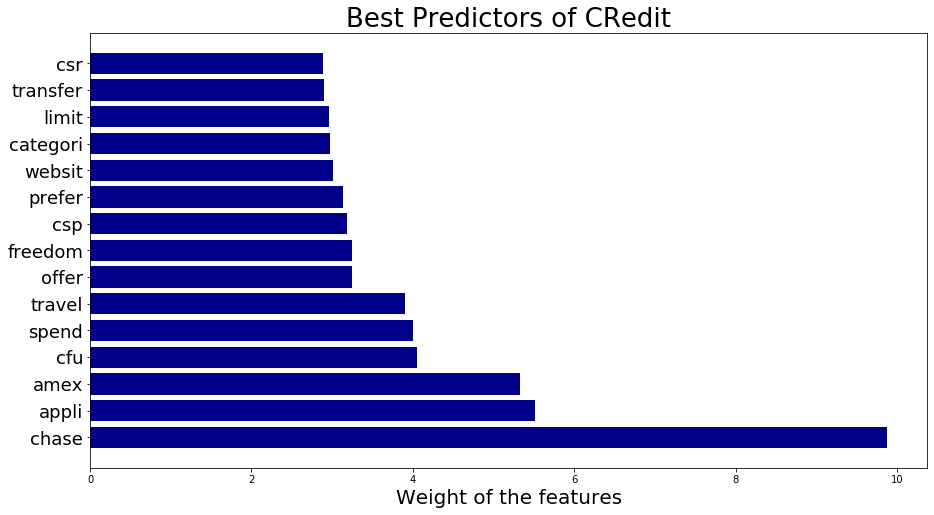

In [127]:
# list features with 
coef_df = pd.DataFrame(list(zip(df_tvec,np.exp(logregtf.coef_[0]))))
# creating a table of the top 15 coefficients and the words they belong to
table = coef_df.sort_values(1,ascending=False).head(15)
# Create a horizontal barplot
plt.figure(figsize=(15,8))
# To make the most relevant words as the largest bar
plt.barh(table[0], (table[1]),color='darkblue')
# labeling and formatting the y axis
plt.xlabel('Weight of the features', fontsize=20)
# flips the y axis so that the largest bars are on top
#plt.ylim(plt.ylim()[::-1])
# setting the font of the yticks
plt.yticks(fontsize=18)
# setting and formatting the title
plt.title('Best Predictors of CRedit', fontsize=26);

In [128]:
coef_df.sort_values(1,ascending=False).head(15)

,0,1
373,chase,9.879288
117,appli,5.520216
84,amex,5.328866
361,cfu,4.054279
2155,spend,4.004073
2377,travel,3.902725
1574,offer,3.249639
957,freedom,3.240471
537,csp,3.184329
1724,prefer,3.137483


In [129]:

# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in logregtf.predict_proba(test_tvec_features)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

# store accuracy and roc_auc scores to summary dataframe.
ph1_summary_df = ph1_summary_df.append({'Model Type':'Logistic Regression',
                                    'Description':'Train dataset on TF-IDF',
                                    'Accuracy':logregtf.score(train_tvec_features, y_train),
                                    'ROC_AUC': 0},
                                   ignore_index=True)


ph1_summary_df = ph1_summary_df.append({'Model Type':'Logistic Regression',
                                    'Description':'Test dataset TF-IDF',
                                    'Accuracy': logregtf.score(test_tvec_features, y_test),
                                    'ROC_AUC': roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])},
                                   ignore_index=True)




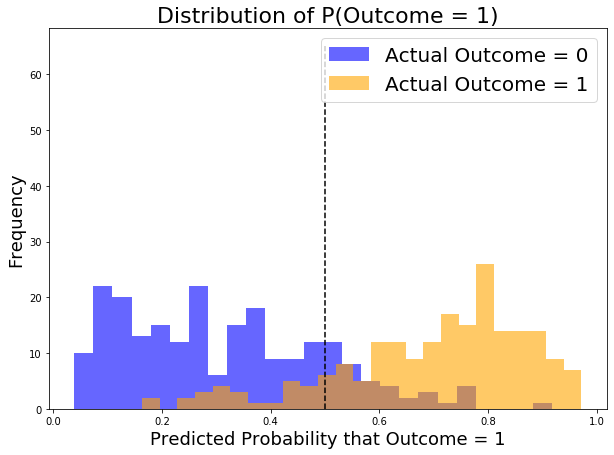

In [130]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Actual Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Actual Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 65,
           color = 'black',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

**Moving the threshhold line from .5 to .2 to visually review on how it changes the TP=True Postive classification**

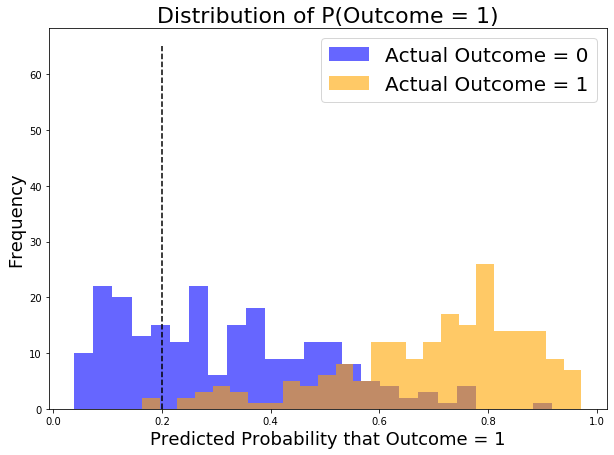

In [131]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Actual Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Actual Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.2.
plt.vlines(x = 0.2,
           ymin = 0,
           ymax = 65,
           color = 'black',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

**Observation: Moving the threshhold for probability to .2 will incease the TP score substantially.**

### Analyse Confusion Matrix  Logistic Reg with TF-IDF

In [132]:
cm_logreg_tf = confusion_matrix(y_test, ytf_test_pred,normalize='true')
cm_logreg_tf

array([[0.82511211, 0.17488789],
       [0.12682927, 0.87317073]])

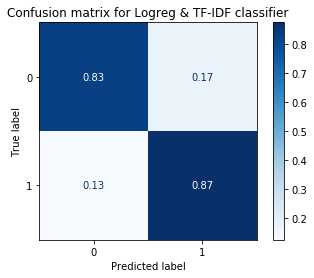

In [133]:
# Generate confusion matrix
matrix = plot_confusion_matrix(logregtf, test_tvec_features, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Logreg & TF-IDF classifier')
plt.show(matrix)
plt.show()

In [134]:
tn, fp, fn, tp = cm_logreg_tf.ravel()

In [135]:
print("True Negatives: " + str(tn))
print()
print("False Positives: " + str(fp))
print()
print("False Negatives: " + str(fn))
print()
print("True Positives: " + str(tp))

True Negatives: 0.8251121076233184

False Positives: 0.17488789237668162

False Negatives: 0.12682926829268293

True Positives: 0.8731707317073171


**Observation:** CRedit is classified slightly better than CreditCards.

### GridSearchCv with LogReg on TF-IDF Vectorizer

In [136]:
    X = train_tvec_features
    y = y_train
    parameters = {'C': [0.001, 0.01, 0.1, 1, 10],
              'class_weight': [None, 'balanced'],
              'penalty': ['l1', 'l2']}
    
    gs_results = GridSearchCV(estimator = LogisticRegression(random_state = 42, solver='liblinear'), # Specify the model we want to GridSearch.
                          param_grid = parameters,                           # Specify the grid of parameters we want to search.
                          scoring = 'accuracy',                              # Specify accuracy as the metric to optimize 
                          cv = 5).fit(X, y)                      # Set 5-fold cross-validation, then fit. (Default is 3.)

In [137]:
gs_results.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Based on the results of this GridSearch, our best model is that which:
- Has an inverse regularization strength of C = .01
- Has class_weight = balanced.
- Has the `L2` penalty.

**Applying parameter proposed by GridSearch to LogReg on TF-IDF**

In [138]:
# Instantiate logistic regression.
logregtf1 = LogisticRegression(solver = 'lbfgs',class_weight='balanced',penalty='l2', C = .01)

# Fit logistic regression.
logregtf1.fit(train_tvec_features,y_train)
# Evaluate logistic regression.
print(f'GridS Training logreg accuracy score using TF-IDF: {logregtf1.score(train_tvec_features, y_train)}')
print(f'GridS Testing logreg accuracy score using TF-IDF: {logregtf1.score(test_tvec_features, y_test)}')

# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in logregtf1.predict_proba(test_tvec_features)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

# store accuracy and roc_auc scores to summary dataframe.
ph1_summary_df = ph1_summary_df.append({'Model Type':'Logistic Regression',
                                    'Description':'Train dataset on TF-IDF',
                                    'Accuracy':logregtf1.score(train_tvec_features, y_train),
                                    'ROC_AUC': 0},
                                   ignore_index=True)


ph1_summary_df = ph1_summary_df.append({'Model Type':'Logistic Regression',
                                    'Description':'Test dataset TF-IDF',
                                    'Accuracy': logregtf1.score(test_tvec_features, y_test),
                                    'ROC_AUC': roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])},
                                   ignore_index=True)


GridS Training logreg accuracy score using TF-IDF: 0.8735362997658079
GridS Testing logreg accuracy score using TF-IDF: 0.8294392523364486


**Observation:** While GridsearchCV results in lower accuracy of Logistic Reg model, however it is far less overfitted when compared with scores from logreg model on TF-IDF dataset.

## ROC AUC Curve Review

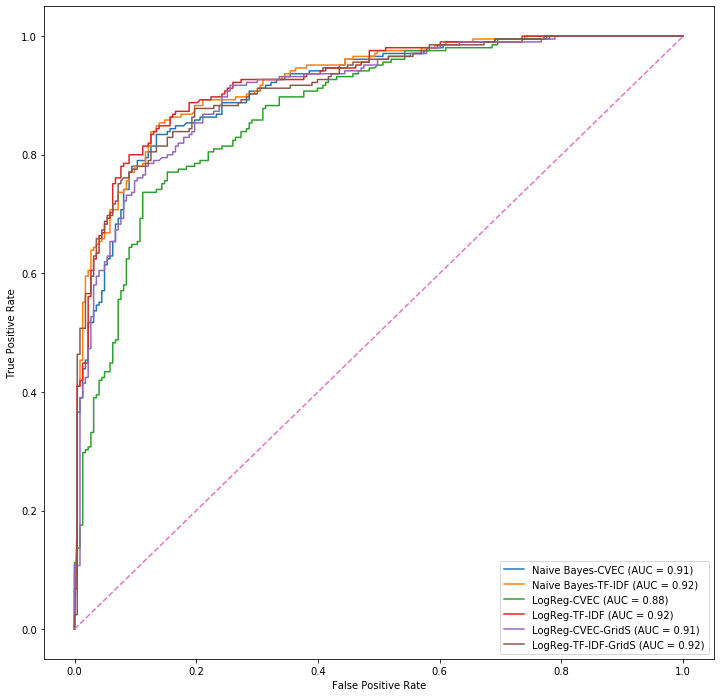

In [139]:
fig, ax = plt.subplots(figsize=(12,12));
nb_cvec_plot = plot_roc_curve(nb_cv, test_data_features, y_test, name='Naive Bayes-CVEC',ax=ax);
nb_tvec_plot = plot_roc_curve(nb_tf, test_tvec_features, y_test, name='Naive Bayes-TF-IDF',ax=nb_cvec_plot.ax_);
lr_cvec_plot = plot_roc_curve(logreg, test_data_features, y_test, name='LogReg-CVEC', ax=nb_tvec_plot.ax_);
lr_tvec_plot = plot_roc_curve(logregtf, test_tvec_features, y_test, name='LogReg-TF-IDF', ax=lr_cvec_plot.ax_);
lr1_cvec_plot = plot_roc_curve(logreg1, test_data_features, y_test, name='LogReg-CVEC-GridS', ax=lr_cvec_plot.ax_);
lr1_tvec_plot = plot_roc_curve(logregtf1, test_tvec_features, y_test, name='LogReg-TF-IDF-GridS', ax=lr_cvec_plot.ax_);
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--');

In [140]:
ph1_summary_df.sort_values('Accuracy',ascending=False)

,Model Type,Description,Accuracy,ROC_AUC
5,Logistic Regression,Train dataset on CVec,0.993755,0
9,Logistic Regression,Train dataset on TF-IDF,0.921155,0
3,Naive Bayes,Train dataset on TF-IDF,0.900859,0
1,Naive Bayes,Train dataset on CVec,0.899297,0
7,Logistic Regression with GS params,Train dataset on CVec,0.874317,0
11,Logistic Regression,Train dataset on TF-IDF,0.873536,0
10,Logistic Regression,Test dataset TF-IDF,0.848131,0.923756
4,Naive Bayes,Test dataset on TF-IDF,0.841121,0.92345
2,Naive Bayes,Test dataset on CVec,0.838785,0.912873
12,Logistic Regression,Test dataset TF-IDF,0.829439,0.915597


**Baseline Proportion**
0    0.521028
1    0.478972




###  Conclusions 

**After evaluating and tuning Naive Bayes and Logistic Regression model and using accuracy and roc_auc scores, it is concluded that model built with Logistic regression and Tf-IDF Word vectorizer will be used for future selection of subreddits r/CreditCards & r/Credit from reddit to have one list of posts which is relavent to Credit Card business, for marketing and legal teams to review.**

### Recommendations
- **More analysis can be done to identify common words across the subreddits**
- **Techniques like pipeline & GridSearch could be leveraged for estimating hyper-parameters for word vectorizers.** 
- **As first version of the nlp classification model is ready, team could evaluate posts related to Credit Cards on other social media sites with this classifier.** 